# Seoul Bike Rental

### Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand). 

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


### Attribute Information:

`Date` : year-month-day

`Rented Bike count` - Count of bikes rented at each hour

`Hour` - Hour of the day

`Temperature`-Temperature in Celsius

`Humidity` - %

`Windspeed` - m/s

`Visibility` - 10m

`Dew point temperature` - Celsius

`Solar radiation` - MJ/m2

`Rainfall` - mm

`Snowfall` - cm

`Seasons` - Winter, Spring, Summer, Autumn

`Holiday` - Holiday/No holiday

`Functional Day` - NoFunc(Non Functional Hours), Fun(Functional hours)


## Exploring the Data
Run the code cell below to load necessary Python libraries and load the Bike Rental data. Note that the column from this dataset, `Rented Bike count`, will be our target label (is the count of bikes rented at each hour). All other columns are features about each hour weather database.

In [122]:
%matplotlib inline

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet

In [123]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv",encoding= 'unicode_escape')

In [124]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [125]:
date = df.Date
df = df.drop('Date', axis=1)
df['Date'] = pd.to_datetime(date)
df['Day'] = df.Date.dt.dayofweek

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Rented Bike Count          8760 non-null   int64         
 1   Hour                       8760 non-null   int64         
 2   Temperature(°C)            8760 non-null   float64       
 3   Humidity(%)                8760 non-null   int64         
 4   Wind speed (m/s)           8760 non-null   float64       
 5   Visibility (10m)           8760 non-null   int64         
 6   Dew point temperature(°C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

Renaming the columns for easy Data handling

In [127]:
df = df.rename(columns={'Rented Bike Count': 'Rented_Bike_Count',
                        'Temperature(°C)': 'Temp',
                        'Humidity(%)':'Humidity',
                        'Wind speed (m/s)': 'Wind_speed',
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'DP temp',
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall'})

In [128]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temp', 'Humidity', 'Wind_speed',
       'Visibility', 'DP temp', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning Day', 'Date', 'Day'],
      dtype='object')

In [129]:
df.isnull().any()

Rented_Bike_Count    False
Hour                 False
Temp                 False
Humidity             False
Wind_speed           False
Visibility           False
DP temp              False
Solar_Radiation      False
Rainfall             False
Snowfall             False
Seasons              False
Holiday              False
Functioning Day      False
Date                 False
Day                  False
dtype: bool

In [130]:
sum(df.duplicated())

0

From the above calles we can see that there is no duplicated or null value in the Dataframe

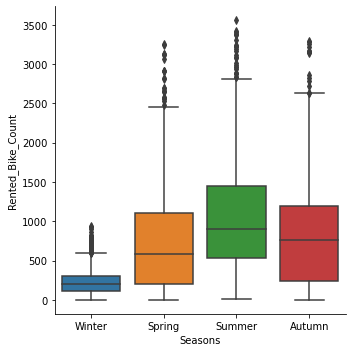

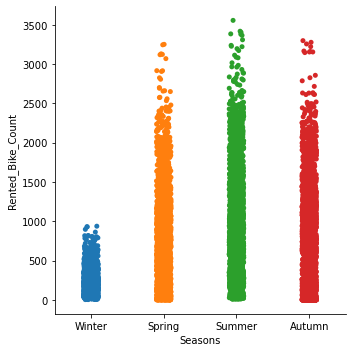

In [131]:
# Season and number of reanted Bike
sns.catplot(x="Seasons", y='Rented_Bike_Count', kind="box", data=df );
sns.catplot(x="Seasons", y='Rented_Bike_Count', data=df);


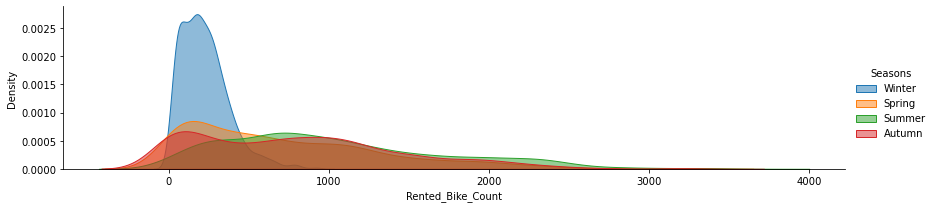

In [132]:
fig = sns.FacetGrid(df, hue='Seasons', aspect=4);
fig.map(sns.kdeplot, 'Rented_Bike_Count',fill=True, common_norm=False, palette='crest',alpha=.5, linewidth=1);

fig.add_legend();

##### If there is a season the bikes are rented more than others?
The most rented season are Summer then Spring and the lest season for bike rentel is Winter

In [133]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [134]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [135]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [136]:

df.Holiday = df.Holiday.apply(lambda x: 1 if x == 'Holiday' else 0)
df['Functioning Day'] = df['Functioning Day'].apply(lambda x: 0 if x == 'No' else 1)
dicts={
    'Spring':1,
    'Summer':2,
    'Autumn':3,
    'Winter':4}
seasons=[]
for i in df.Seasons:
    seasons.append(dicts.get(i))
df.Seasons=seasons

In the above cell we are changing the Holiday rather being Holiday and No Holiday to be 1 and 0, Functioning Day rather yes and no to be 1 and 0 , and for the Seasons to be 1 for Spring, 2 for Summer, 3 for Autumn, and 4 for Winter.

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rented_Bike_Count  8760 non-null   int64         
 1   Hour               8760 non-null   int64         
 2   Temp               8760 non-null   float64       
 3   Humidity           8760 non-null   int64         
 4   Wind_speed         8760 non-null   float64       
 5   Visibility         8760 non-null   int64         
 6   DP temp            8760 non-null   float64       
 7   Solar_Radiation    8760 non-null   float64       
 8   Rainfall           8760 non-null   float64       
 9   Snowfall           8760 non-null   float64       
 10  Seasons            8760 non-null   int64         
 11  Holiday            8760 non-null   int64         
 12  Functioning Day    8760 non-null   int64         
 13  Date               8760 non-null   datetime64[ns]
 14  Day     

In [138]:
color = sns.color_palette()[9] 

In [139]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B5FB831280> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Plot relations as scatterplots
sns.pairplot(df.drop(['Seasons','Holiday','Functioning Day'], axis=1), height = 2.5, aspect = 1);

this plot shows the relations between the Columns

In [140]:
#df.hist(figsize=(10,10),color=color);

In [141]:
#df.hist('Rented_Bike_Count',color=color,figsize=(10,10));

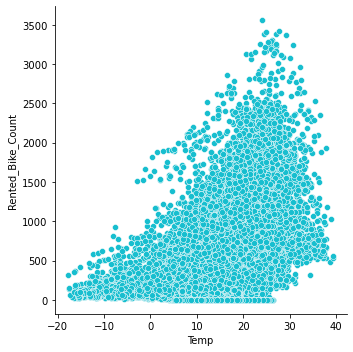

In [142]:
# Scatter plot bikes rented by temperature. 
sns.relplot(data = df,x='Temp',y='Rented_Bike_Count',color=color);

Here we can the how dose the Temprature affect the Rental

In [143]:
# Rainfall & Humidity 
#sns.relplot(data=df, x='Humidity', y='Rainfall',color=color);

In [144]:
df['weekday'] = df.Day <=5

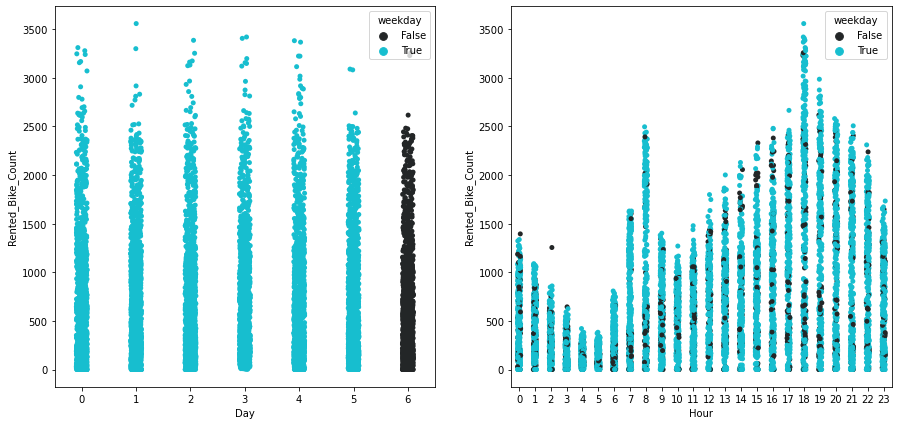

In [151]:
fig, axs = plt.subplots (1, 2, figsize=(15, 7))
sns.stripplot(x='Day',y='Rented_Bike_Count' , hue='weekday', data=df, ax=axs[0],color=color);
sns.stripplot(x='Hour',y='Rented_Bike_Count' , hue='weekday', data=df, ax=axs[1],color=color);

##### Is there an hour the bikes are rented most?
The most bikes rented in hour is 18 wich which is 6 pm

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rented_Bike_Count  8760 non-null   int64         
 1   Hour               8760 non-null   int64         
 2   Temp               8760 non-null   float64       
 3   Humidity           8760 non-null   int64         
 4   Wind_speed         8760 non-null   float64       
 5   Visibility         8760 non-null   int64         
 6   DP temp            8760 non-null   float64       
 7   Solar_Radiation    8760 non-null   float64       
 8   Rainfall           8760 non-null   float64       
 9   Snowfall           8760 non-null   float64       
 10  Seasons            8760 non-null   int64         
 11  Holiday            8760 non-null   int64         
 12  Functioning Day    8760 non-null   int64         
 13  Date               8760 non-null   datetime64[ns]
 14  Day     

In [164]:
df['Hour']==18.Rented_Bike_Count 

AttributeError: 'Series' object has no attribute 'Rented_Bike_Count'

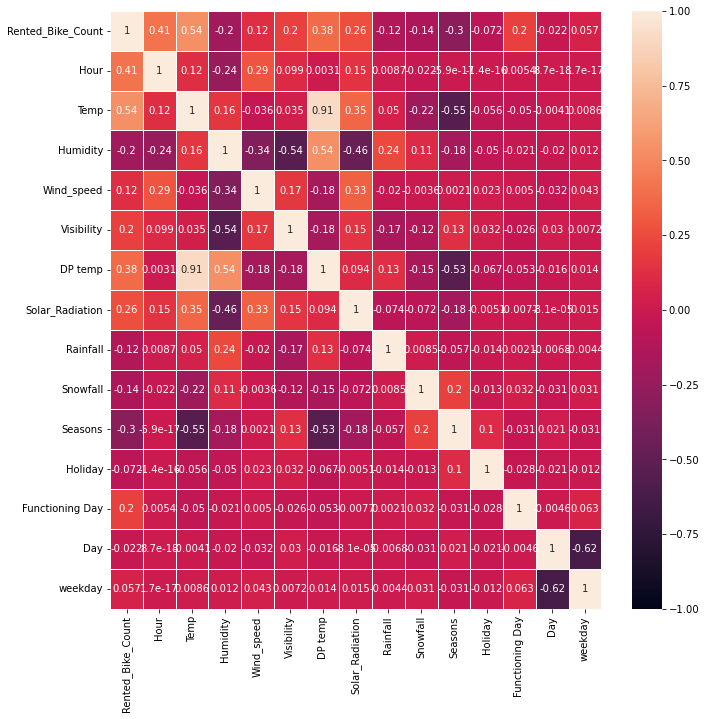

In [146]:
plt.gcf().set_size_inches(11, 11)
sns.heatmap(df.corr(), linewidths=.5, annot=True, vmin=-1, vmax=1);

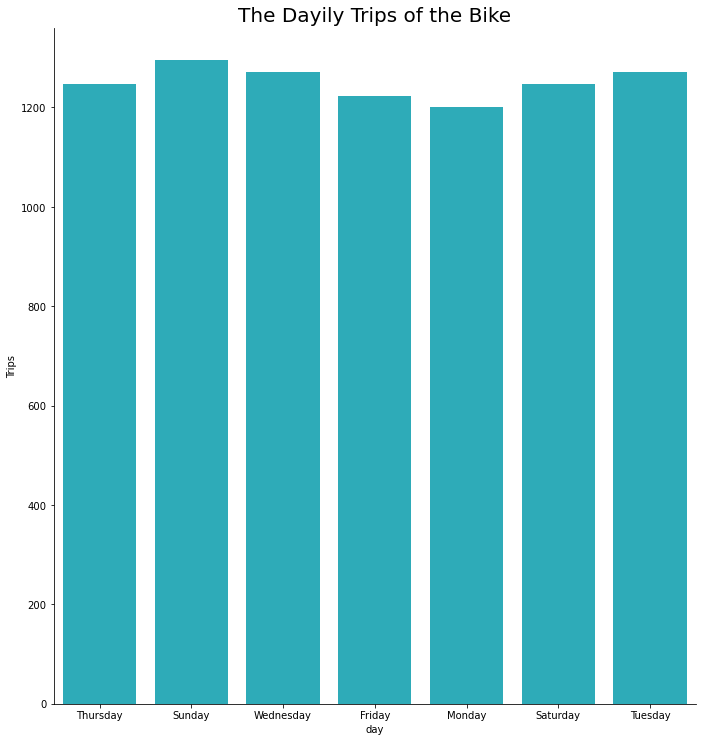

In [147]:
df['day'] = df.Date.dt.day_name()

sns.catplot(data = df, x ='day', kind='count', color = color);
plt.gcf().set_size_inches(11, 11)
plt.title('The Dayily Trips of the Bike',fontsize=20)
plt.ylabel('Trips');
plt.show()

In [148]:
df['day'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day, dtype: int64

##### Which day of the week the bikes are rented more than others?
From the plot above you can see that Friday is the maximum and Saturday is the minimum with 0 reantals.

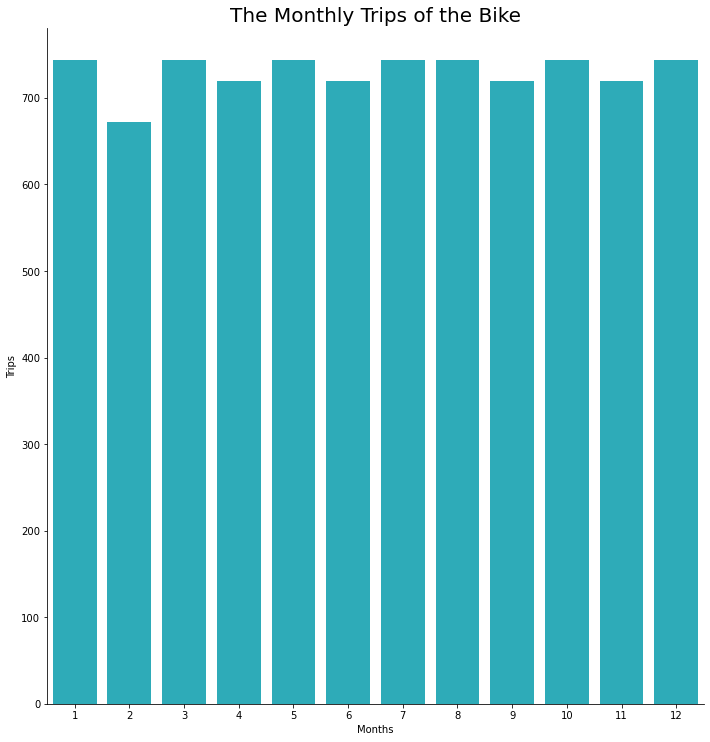

In [79]:
df['month'] = pd.to_datetime(df.Date).dt.month
sns.catplot(data = df, x ='month', kind='count', color = color);
plt.gcf().set_size_inches(11, 11)
plt.title('The Monthly Trips of the Bike',fontsize=20)
plt.xlabel('Months');
plt.ylabel('Trips');
plt.show()

In [165]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temp', 'Humidity', 'Wind_speed',
       'Visibility', 'DP temp', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning Day', 'Date', 'Day', 'weekday',
       'day'],
      dtype='object')

In [167]:
df = df.drop(['Date', 'weekday','day'], axis=1)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Rented_Bike_Count'), df['Rented_Bike_Count'], test_size = 0.2, random_state=42)
# Show the results of the split
print('Training set has', X_train.shape[0],'samples.')
print('Testing set has', X_test.shape[0],'samples.')

Training set has 7008 samples.
Testing set has 1752 samples.


In [177]:
# Configure Algorithms
regressors = [#('Logistic Regression',LogisticRegression()),
              ('Support Vector Regression',SVR()),
              ('Linear Regression',LinearRegression()),
              ('Random Forest Regressor',RandomForestRegressor()),
              ('Kernel Ridge Regression',KernelRidge()),
              ('Gradient Boosting Regression',GradientBoostingRegressor()),
              ('Elastic Net Regression',ElasticNet())]
results = []
names = []
for name, model in regressors:
    result = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    names.append(name)
    results.append(result)

Support Vector Regression 0.3538527065387017
Linear Regression 0.5211299731506274
Random Forest Regressor 0.8864458102890593
Kernel Ridge Regression 0.48436989664281543
Gradient Boosting Regression 0.8373535389162896
Elastic Net Regression 0.47014790223470515


Text(0, 0.5, 'R2 score')

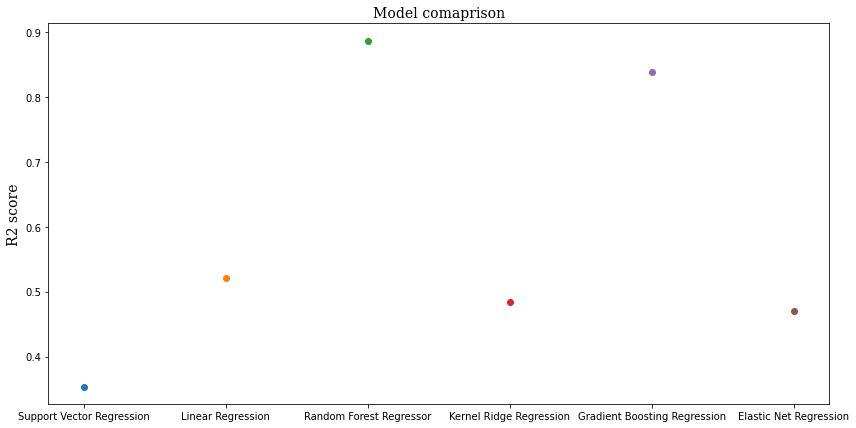

In [178]:
plt.figure(figsize = (14,7))
for i in range(len(names)):
    print(names[i],results[i].mean())
    plt.scatter(x = names[i] , y = results[i].mean());
plt.title("Model comaprison" , fontdict = {'family':'serif' , 'size':14})
plt.ylabel("R2 score" , fontdict = {'family':'serif' , 'size':14})    

from the above cell you can see that the Random Forest Regressor is the best model and Gradient Boosting Regression 

In [170]:
rfr = RandomForestRegressor(n_estimators = 600,max_depth=5, min_samples_split=3)
model = rfr.fit(X_train,y_train)
predictions_train = model.predict(X_train)
predRsquared = r2_score(y_train,predictions_train)
rmse = math.sqrt(mean_squared_error(y_train, predictions_train))
print('R Squared: ' , predRsquared)
print('RMSE: ', rmse)

R Squared:  0.7641646394889212
RMSE:  313.1481804600384


In [171]:
gbr = GradientBoostingRegressor(n_estimators=600, max_depth=5, learning_rate=0.01, min_samples_split=3)
model = gbr.fit(X_train,y_train)
predictions_train = model.predict(X_train)
prediction = model.predict(X_test)
predRsquared = r2_score(y_train,predictions_train)
rmse = math.sqrt(mean_squared_error(y_train, predictions_train))
print('R Squared: ' , predRsquared)
print('RMSE: ', rmse)

R Squared:  0.9074152904706791
RMSE:  196.20725661939352


Here we can see after adding featers for the RandomForestRegressor the R Squared got worst but GradientBoostingRegressor is geting better

In [172]:
rfr1 = RandomForestRegressor(n_estimators = 600)
model = rfr1.fit(X_train,y_train)
predictions_train = model.predict(X_train)
predRsquared = r2_score(y_train,predictions_train)
rmse = math.sqrt(mean_squared_error(y_train, predictions_train))
print('R Squared: ' , predRsquared)
print('RMSE: ', rmse)

R Squared:  0.9857386734196089
RMSE:  77.00614697961677


In [88]:
gbr2 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=600)
model = gbr2.fit(X_train,y_train)
predictions_train = model.predict(X_train)
predRsquared = r2_score(y_train,predictions_train)
rmse = math.sqrt(mean_squared_error(y_train, predictions_train))
print('R Squared: ' , predRsquared)
print('RMSE: ', rmse)

R Squared:  0.9269003794812776
RMSE:  174.34238888570303


From the above cells we can see that RandomForestRegressor is best model 

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Rented_Bike_Count','DP temp','Solar_Radiation','Functioning Day'])
                                                    , df['Rented_Bike_Count'], test_size = 0.2, random_state=42)
# Show the results of the split
print('Training set has', X_train.shape[0],'samples.')
print('Testing set has', X_test.shape[0],'samples.')

model = rfr1.fit(X_train,y_train)
predictions_train = model.predict(X_train)
predRsquared = r2_score(y_train,predictions_train)
rmse = math.sqrt(mean_squared_error(y_train, predictions_train))
print('R Squared: ' , predRsquared)
print('RMSE: ', rmse)

Training set has 7008 samples.
Testing set has 1752 samples.
R Squared:  0.9748688351502198
RMSE:  102.2237340197762


In [174]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Rented_Bike_Count','Rainfall', 'Snowfall'])
                                                    , df['Rented_Bike_Count'], test_size = 0.2, random_state=42)
# Show the results of the split
print('Training set has', X_train.shape[0],'samples.')
print('Testing set has', X_test.shape[0],'samples.')

model = rfr1.fit(X_train,y_train)
predictions_train = model.predict(X_train)
predRsquared = r2_score(y_train,predictions_train)
rmse = math.sqrt(mean_squared_error(y_train, predictions_train))
print('R Squared: ' , predRsquared)
print('RMSE: ', rmse)


Training set has 7008 samples.
Testing set has 1752 samples.
R Squared:  0.984332603706827
RMSE:  80.7130661340993


We can see from the cells above that removing the columns the predictions lower R Squared score

In [175]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Rented_Bike_Count','Humidity','Visibility'])
                                                    , df['Rented_Bike_Count'], test_size = 0.2, random_state=42)
# Show the results of the split
print('Training set has', X_train.shape[0],'samples.')
print('Testing set has', X_test.shape[0],'samples.')


model = rfr1.fit(X_train,y_train)
predictions_train = model.predict(X_train)
predRsquared = r2_score(y_train,predictions_train)
rmse = math.sqrt(mean_squared_error(y_train, predictions_train))
print('R Squared: ' , predRsquared)
print('RMSE: ', rmse)


Training set has 7008 samples.
Testing set has 1752 samples.
R Squared:  0.9857087992640947
RMSE:  77.0867597510915


after trying removing combination of columns `Humidity`,`Visibility` are the colums that increased R Squared score by a litte bit

In [176]:
predictions_test = model.predict(X_test)
predRsquared = r2_score(y_test,predictions_test)
rmse = math.sqrt(mean_squared_error(y_test, predictions_test))
print('R Squared:' , predRsquared)
print('RMSE: ',rmse)

R Squared: 0.8769467374613737
RMSE:  226.4280876447692


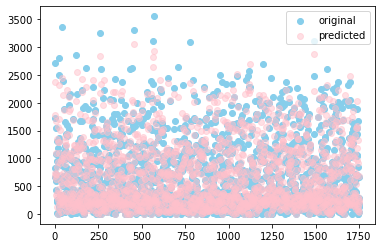

In [93]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, color="skyblue", label="original")
plt.scatter(x_ax, predictions_test, color="pink", label="predicted",alpha=0.5)
plt.legend()
plt.show()

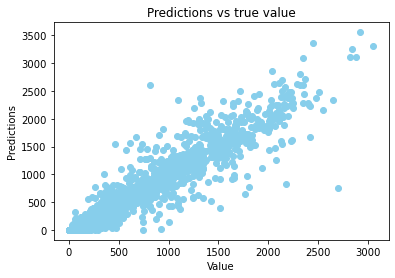

In [94]:
plt.scatter(predictions_test, y_test, color="skyblue");
plt.xlabel('Value');
plt.ylabel('Predictions');
plt.title('Predictions vs true value');

The above map shows the strong correlation between the Predictions of bikes rented count and true bikes rented